In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv1D, Conv2D, Flatten, concatenate, BatchNormalization, ReLU, Dropout
from tensorflow.keras.models import Model
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.metrics import AUC
import numpy as np
import itertools
import os
from tqdm import tqdm

2025-02-21 04:34:00.704383: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-21 04:34:01.114137: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-21 04:34:01.843037: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-21 04:34:01.843082: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-21 04:34:01.845928: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [2]:
data_common_bone_meta = pd.read_csv("Input_data/common_genes_data_bone_meta.csv", index_col=0)
data_common_brain_meta = pd.read_csv("Input_data/common_genes_data_brain_meta.csv", index_col=0)
data_common_liver_meta = pd.read_csv("Input_data/common_genes_data_liver_meta.csv", index_col=0)
data_common_lung_meta = pd.read_csv("Input_data/common_genes_data_lung_meta.csv", index_col=0)

data_common_bone_nonmeta = pd.read_csv("Input_data/common_genes_data_bone_nonmeta.csv", index_col=0)
data_common_brain_nonmeta = pd.read_csv("Input_data/common_genes_data_brain_nonmeta.csv", index_col=0)
data_common_liver_nonmeta = pd.read_csv("Input_data/common_genes_data_liver_nonmeta.csv", index_col=0)
data_common_lung_nonmeta = pd.read_csv("Input_data/common_genes_data_lung_nonmeta.csv", index_col=0)


data_unique_bone_meta = pd.read_csv("Input_data/unique_genes_data_bone_meta.csv", index_col=0)
data_unique_brain_meta = pd.read_csv("Input_data/unique_genes_data_brain_meta.csv", index_col=0)
data_unique_liver_meta = pd.read_csv("Input_data/unique_genes_data_liver_meta.csv", index_col=0)
data_unique_lung_meta = pd.read_csv("Input_data/unique_genes_data_lung_meta.csv", index_col=0)

data_unique_bone_nonmeta = pd.read_csv("Input_data/unique_genes_data_bone_nonmeta.csv", index_col=0)
data_unique_brain_nonmeta = pd.read_csv("Input_data/unique_genes_data_brain_nonmeta.csv", index_col=0)
data_unique_liver_nonmeta = pd.read_csv("Input_data/unique_genes_data_liver_nonmeta.csv", index_col=0)
data_unique_lung_nonmeta = pd.read_csv("Input_data/unique_genes_data_lung_nonmeta.csv", index_col=0)
###########

data_common_bone = pd.read_csv("Input_data/common_genes_data_bone.csv", index_col=0)
data_common_brain = pd.read_csv("Input_data/common_genes_data_brain.csv", index_col=0)
data_common_liver = pd.read_csv("Input_data/common_genes_data_liver.csv", index_col=0)
data_common_lung = pd.read_csv("Input_data/common_genes_data_lung.csv", index_col=0)

data_combined = pd.concat([data_common_bone, data_common_brain_meta, data_common_liver_meta, data_common_lung_meta], axis=1)


data_unique_bone = pd.read_csv("Input_data/unique_genes_data_bone.csv", index_col=0)
data_unique_brain = pd.read_csv("Input_data/unique_genes_data_brain.csv", index_col=0)
data_unique_liver= pd.read_csv("Input_data/unique_genes_data_liver.csv", index_col=0)
data_unique_lung= pd.read_csv("Input_data/unique_genes_data_lung.csv", index_col=0)


#Label
path_breast='Input_data/Breast cancer label.csv'
path_colon = 'Input_data/Colon cancer label.csv'
path_lung = 'Input_data/Lung cancer label.csv'
path_pancreatic = 'Input_data/Pancreatic cancer label.csv'
path_prostate = 'Input_data/Prostate cancer label.csv'
path_kidney = 'Input_data/Kidney cancer label.csv'

Breast_cancer_label =  pd.read_csv(path_breast, index_col=0)
Colon_cancer_label =  pd.read_csv(path_colon, index_col=0)
Lung_cancer_label = pd.read_csv(path_lung, index_col=0)
Pancreatic_cancer_label = pd.read_csv(path_pancreatic, index_col=0)
Prostate_cancer_label =pd.read_csv(path_prostate, index_col=0)
Kidney_cancer_label =pd.read_csv(path_kidney, index_col=0)
#combined
combined_label=pd.concat([Breast_cancer_label, Colon_cancer_label, Lung_cancer_label, Pancreatic_cancer_label,Kidney_cancer_label, Prostate_cancer_label], axis=0)


In [3]:
SCC_common_rna_rna = pd.read_csv("Input_data/new_common-ml_input2.csv", index_col=0)
SCC_bone_rna_rna = pd.read_csv("Input_data/new_unique_bone-ml_input2.csv", index_col=0)
SCC_brain_rna_rna = pd.read_csv("Input_data/new_unique_brain-ml_input2.csv", index_col=0)
SCC_liver_rna_rna = pd.read_csv("Input_data/new_unique_liver-ml_input2.csv", index_col=0)
SCC_lung_rna_rna = pd.read_csv("Input_data/new_unique_lung-ml_input2.csv", index_col=0)

In [4]:
#Transposed
data_combined = data_combined.T
SCC_common_rna_rna = SCC_common_rna_rna.T
SCC_bone_rna_rna = SCC_bone_rna_rna.T
SCC_brain_rna_rna = SCC_brain_rna_rna.T
SCC_liver_rna_rna = SCC_liver_rna_rna.T
SCC_lung_rna_rna = SCC_lung_rna_rna.T 
data_common_bone = data_common_bone.T
data_common_brain = data_common_brain.T
data_common_liver = data_common_liver.T
data_common_lung = data_common_lung.T
data_unique_bone = data_unique_bone.T
data_unique_brain = data_unique_brain.T
data_unique_liver = data_unique_liver.T
data_unique_lung = data_unique_lung.T

In [5]:
labels_metastasis = (combined_label[['Bone', 'Brain', 'Liver', 'Lung']].max(axis=1) > 0).astype(int)
#labels_metastasis_df = labels_metastasis.to_frame(name='metastasis')

In [6]:
# 显式复制DataFrame以避免警告
labels_bone = combined_label[(combined_label['Bone'] == 1) | (combined_label['nonmeta'] == 1)].copy()
labels_bone.loc[:, ['Brain', 'Liver', 'Lung']] = 0
labels_bone_metastasis = ((labels_bone['Bone'] == 1) | (labels_bone['nonmeta'] == 0)).astype(int)
# = labels_bone_metastasis.to_frame(name='metastasis')


# 为Brain转移创建标签集
labels_brain = combined_label[(combined_label['Brain'] == 1) | (combined_label['nonmeta'] == 1)].copy()
labels_brain.loc[:, ['Bone', 'Liver', 'Lung']] = 0
labels_brain_metastasis = ((labels_brain['Brain'] == 1) | (labels_brain['nonmeta'] == 0)).astype(int)
#labels_brain_metastasis = labels_brain_metastasis.to_frame(name='metastasis')


# 为Liver转移创建标签集
labels_liver = combined_label[(combined_label['Liver'] == 1) | (combined_label['nonmeta'] == 1)].copy()
labels_liver.loc[:, ['Bone', 'Brain', 'Lung']] = 0
labels_liver_metastasis = ((labels_liver['Liver'] == 1) | (labels_liver['nonmeta'] == 0)).astype(int)
#labels_liver_metastasis = labels_liver_metastasis.to_frame(name='metastasis')



# 为Lung转移创建标签集
labels_lung = combined_label[(combined_label['Lung'] == 1) | (combined_label['nonmeta'] == 1)].copy()
labels_lung.loc[:, ['Bone', 'Brain', 'Liver']] = 0
labels_lung_metastasis = ((labels_lung['Lung'] == 1) | (labels_lung['nonmeta'] == 0)).astype(int)
#labels_lung_metastasis = labels_lung_metastasis.to_frame(name='metastasis')




In [7]:
# 获取不同组织的样本名
brain_samples = data_common_brain.index
bone_samples = data_common_bone.index
liver_samples = data_common_liver.index
lung_samples = data_common_lung.index

# 从 SCC_rna_rna 中提取与不同组织匹配的样本
SCC_common_rna_rna_brain = SCC_common_rna_rna.loc[brain_samples]
SCC_common_rna_rna_bone = SCC_common_rna_rna.loc[bone_samples]
SCC_common_rna_rna_liver = SCC_common_rna_rna.loc[liver_samples]
SCC_common_rna_rna_lung = SCC_common_rna_rna.loc[lung_samples]

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
# 使用Lasso进行特征选择，加入StandardScaler
def select_features(x_train, y_train, alpha=0.01):
    # 检查x_train是否为DataFrame，如果不是，将其转换为DataFrame
    if isinstance(x_train, np.ndarray):
        x_train = pd.DataFrame(x_train)
    
    # 获取特征名称
    feature_names = x_train.columns
    
    # 标准化数据
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    
    # 应用Lasso
    lasso = Lasso(alpha=alpha, max_iter=5000).fit(x_train_scaled, y_train)
    
    # 获取重要特征
    important_features = lasso.coef_ != 0
    selected_feature_names = feature_names[important_features]
    
    # 返回经过选择的特征数据和特征名称
    return x_train_scaled[:, important_features], selected_feature_names
# 获取不同组织的样本名
brain_samples = data_common_brain.index
bone_samples = data_common_bone.index
liver_samples = data_common_liver.index
lung_samples = data_common_lung.index

# 从 SCC_rna_rna 中提取与不同组织匹配的样本
SCC_common_rna_rna_brain = SCC_common_rna_rna.loc[brain_samples]
SCC_common_rna_rna_bone = SCC_common_rna_rna.loc[bone_samples]
SCC_common_rna_rna_liver = SCC_common_rna_rna.loc[liver_samples]
SCC_common_rna_rna_lung = SCC_common_rna_rna.loc[lung_samples]
# ceRNA-matrix
x_train_common = data_combined.values
x_train_common_bone = data_common_bone.values
x_train_common_brain = data_common_brain.values
x_train_common_liver= data_common_liver.values
x_train_common_lung= data_common_lung.values

x_train_common = data_combined.values
x_train_common_bone = data_common_bone.values
x_train_common_brain = data_common_brain.values
x_train_common_liver= data_common_liver.values
x_train_common_lung= data_common_lung.values


## correlation
x_train_common_correlation = SCC_common_rna_rna.values
x_train_common_correlation_bone = SCC_common_rna_rna_bone.values
x_train_common_correlation_brain = SCC_common_rna_rna_brain.values
x_train_common_correlation_liver = SCC_common_rna_rna_liver.values
x_train_common_correlation_lung = SCC_common_rna_rna_lung.values

x_train_bone_correlation = SCC_bone_rna_rna.values
x_train_brain_correlation = SCC_brain_rna_rna.values
x_train_liver_correlation = SCC_liver_rna_rna.values
x_train_lung_correlation = SCC_lung_rna_rna.values
### LABEL

x_train_bone = data_unique_bone.values
x_train_brain = data_unique_brain.values
x_train_liver = data_unique_liver.values
x_train_lung = data_unique_lung.values

y_train_metastasis = labels_metastasis  
y_train_bone = labels_bone_metastasis  
y_train_brain = labels_brain_metastasis  
y_train_liver = labels_liver_metastasis  
y_train_lung = labels_lung_metastasis 


In [9]:
# FEATURE
## GENE MATRIX
x_train_common_selected, features_common = select_features(x_train_common, y_train_metastasis)


x_train_common_bone_selected, features_common = select_features(x_train_common_bone, y_train_bone)
x_train_common_brain_selected, features_common = select_features(x_train_common_brain, y_train_brain)
x_train_common_liver_selected, features_common = select_features(x_train_common_liver, y_train_liver)
x_train_common_lung_selected, features_common = select_features(x_train_common_lung, y_train_lung)

x_train_bone_selected, features_bone = select_features(x_train_bone, y_train_bone)
x_train_brain_selected, features_brain = select_features(x_train_brain, y_train_brain)
x_train_liver_selected, features_liver = select_features(x_train_liver, y_train_liver)
x_train_lung_selected, features_lung = select_features(x_train_lung, y_train_lung)

### CORRELATION
# common
x_train_common_correlation_selected, correlation_features_selected = select_features(x_train_common_correlation, labels_metastasis)
x_train_common_correlation_bone_selected, correlation_features_selected_bone = select_features(x_train_common_correlation_bone, y_train_bone)
x_train_common_correlation_brain_selected, correlation_features_selected_brain = select_features(x_train_common_correlation_brain, y_train_brain) 
x_train_common_correlation_liver_selected, correlation_features_selected_liver = select_features(x_train_common_correlation_liver, y_train_liver) 
x_train_common_correlation_lung_selected, correlation_features_selected_lung = select_features(x_train_common_correlation_lung, y_train_lung)
# unique 
x_train_unique_correlation_bone_selected, correlation_features_selected_bone = select_features(x_train_bone_correlation, y_train_bone)
x_train_unique_correlation_brain_selected, correlation_features_selected_brain = select_features(x_train_brain_correlation, y_train_brain)
x_train_unique_correlation_liver_selected, correlation_features_selected_liver = select_features(x_train_liver_correlation, y_train_liver)
x_train_unique_correlation_lung_selected, correlation_features_selected_lung = select_features(x_train_lung_correlation, y_train_lung)

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 设置SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)

# 用于存储划分后的训练集和测试集
train_test_data = {}

# GENE MATRIX
x_train_common_train, x_train_common_test, y_train_common_train, y_train_common_test = train_test_split(
    x_train_common_selected, y_train_metastasis, test_size=0.3, random_state=42)

# 使用 SMOTE 对训练集进行过采样
x_train_common_train_smote, y_train_common_train_smote = smote.fit_resample(x_train_common_train, y_train_common_train)
train_test_data['x_train_common'] = (x_train_common_train_smote, x_train_common_test, y_train_common_train_smote, y_train_common_test)

# 对每个其他训练集应用相同的SMOTE步骤
x_train_common_bone_train, x_train_common_bone_test, y_train_common_bone_train, y_train_common_bone_test = train_test_split(
    x_train_common_bone_selected, y_train_bone, test_size=0.3, random_state=42)
x_train_common_bone_train_smote, y_train_common_bone_train_smote = smote.fit_resample(x_train_common_bone_train, y_train_common_bone_train)
train_test_data['x_train_common_bone'] = (x_train_common_bone_train_smote, x_train_common_bone_test, y_train_common_bone_train_smote, y_train_common_bone_test)

x_train_common_brain_train, x_train_common_brain_test, y_train_common_brain_train, y_train_common_brain_test = train_test_split(
    x_train_common_brain_selected, y_train_brain, test_size=0.3, random_state=42)
x_train_common_brain_train_smote, y_train_common_brain_train_smote = smote.fit_resample(x_train_common_brain_train, y_train_common_brain_train)
train_test_data['x_train_common_brain'] = (x_train_common_brain_train_smote, x_train_common_brain_test, y_train_common_brain_train_smote, y_train_common_brain_test)

x_train_common_liver_train, x_train_common_liver_test, y_train_common_liver_train, y_train_common_liver_test = train_test_split(
    x_train_common_liver_selected, y_train_liver, test_size=0.3, random_state=42)
x_train_common_liver_train_smote, y_train_common_liver_train_smote = smote.fit_resample(x_train_common_liver_train, y_train_common_liver_train)
train_test_data['x_train_common_liver'] = (x_train_common_liver_train_smote, x_train_common_liver_test, y_train_common_liver_train_smote, y_train_common_liver_test)

x_train_common_lung_train, x_train_common_lung_test, y_train_common_lung_train, y_train_common_lung_test = train_test_split(
    x_train_common_lung_selected, y_train_lung, test_size=0.3, random_state=42)
x_train_common_lung_train_smote, y_train_common_lung_train_smote = smote.fit_resample(x_train_common_lung_train, y_train_common_lung_train)
train_test_data['x_train_common_lung'] = (x_train_common_lung_train_smote, x_train_common_lung_test, y_train_common_lung_train_smote, y_train_common_lung_test)

# Individual tissue datasets
x_train_bone_train, x_train_bone_test, y_train_bone_train, y_train_bone_test = train_test_split(
    x_train_bone_selected, y_train_bone, test_size=0.3, random_state=42)
x_train_bone_train_smote, y_train_bone_train_smote = smote.fit_resample(x_train_bone_train, y_train_bone_train)
train_test_data['x_train_bone'] = (x_train_bone_train_smote, x_train_bone_test, y_train_bone_train_smote, y_train_bone_test)

x_train_brain_train, x_train_brain_test, y_train_brain_train, y_train_brain_test = train_test_split(
    x_train_brain_selected, y_train_brain, test_size=0.3, random_state=42)
x_train_brain_train_smote, y_train_brain_train_smote = smote.fit_resample(x_train_brain_train, y_train_brain_train)
train_test_data['x_train_brain'] = (x_train_brain_train_smote, x_train_brain_test, y_train_brain_train_smote, y_train_brain_test)

x_train_liver_train, x_train_liver_test, y_train_liver_train, y_train_liver_test = train_test_split(
    x_train_liver_selected, y_train_liver, test_size=0.3, random_state=42)
x_train_liver_train_smote, y_train_liver_train_smote = smote.fit_resample(x_train_liver_train, y_train_liver_train)
train_test_data['x_train_liver'] = (x_train_liver_train_smote, x_train_liver_test, y_train_liver_train_smote, y_train_liver_test)

x_train_lung_train, x_train_lung_test, y_train_lung_train, y_train_lung_test = train_test_split(
    x_train_lung_selected, y_train_lung, test_size=0.3, random_state=42)
x_train_lung_train_smote, y_train_lung_train_smote = smote.fit_resample(x_train_lung_train, y_train_lung_train)
train_test_data['x_train_lung'] = (x_train_lung_train_smote, x_train_lung_test, y_train_lung_train_smote, y_train_lung_test)

# CORRELATION MATRICES
# Common correlation matrices
x_train_common_correlation_train, x_train_common_correlation_test, y_train_common_correlation_train, y_train_common_correlation_test = train_test_split(
    x_train_common_correlation_selected, y_train_metastasis, test_size=0.3, random_state=42)
x_train_common_correlation_train_smote, y_train_common_correlation_train_smote = smote.fit_resample(x_train_common_correlation_train, y_train_common_correlation_train)
train_test_data['x_train_common_correlation'] = (x_train_common_correlation_train_smote, x_train_common_correlation_test, y_train_common_correlation_train_smote, y_train_common_correlation_test)

x_train_common_correlation_bone_train, x_train_common_correlation_bone_test, y_train_common_correlation_bone_train, y_train_common_correlation_bone_test = train_test_split(
    x_train_common_correlation_bone_selected, y_train_bone, test_size=0.3, random_state=42)
x_train_common_correlation_bone_train_smote, y_train_common_correlation_bone_train_smote = smote.fit_resample(x_train_common_correlation_bone_train, y_train_common_correlation_bone_train)
train_test_data['x_train_common_correlation_bone'] = (x_train_common_correlation_bone_train_smote, x_train_common_correlation_bone_test, y_train_common_correlation_bone_train_smote, y_train_common_correlation_bone_test)

x_train_common_correlation_brain_train, x_train_common_correlation_brain_test, y_train_common_correlation_brain_train, y_train_common_correlation_brain_test = train_test_split(
    x_train_common_correlation_brain_selected, y_train_brain, test_size=0.3, random_state=42)
x_train_common_correlation_brain_train_smote, y_train_common_correlation_brain_train_smote = smote.fit_resample(x_train_common_correlation_brain_train, y_train_common_correlation_brain_train)
train_test_data['x_train_common_correlation_brain'] = (x_train_common_correlation_brain_train_smote, x_train_common_correlation_brain_test, y_train_common_correlation_brain_train_smote, y_train_common_correlation_brain_test)

x_train_common_correlation_liver_train, x_train_common_correlation_liver_test, y_train_common_correlation_liver_train, y_train_common_correlation_liver_test = train_test_split(
    x_train_common_correlation_liver_selected, y_train_liver, test_size=0.3, random_state=42)
x_train_common_correlation_liver_train_smote, y_train_common_correlation_liver_train_smote = smote.fit_resample(x_train_common_correlation_liver_train, y_train_common_correlation_liver_train)
train_test_data['x_train_common_correlation_liver'] = (x_train_common_correlation_liver_train_smote, x_train_common_correlation_liver_test, y_train_common_correlation_liver_train_smote, y_train_common_correlation_liver_test)

x_train_common_correlation_lung_train, x_train_common_correlation_lung_test, y_train_common_correlation_lung_train, y_train_common_correlation_lung_test = train_test_split(
    x_train_common_correlation_lung_selected, y_train_lung, test_size=0.3, random_state=42)
x_train_common_correlation_lung_train_smote, y_train_common_correlation_lung_train_smote = smote.fit_resample(x_train_common_correlation_lung_train, y_train_common_correlation_lung_train)
train_test_data['x_train_common_correlation_lung'] = (x_train_common_correlation_lung_train_smote, x_train_common_correlation_lung_test, y_train_common_correlation_lung_train_smote, y_train_common_correlation_lung_test)

# Unique correlation matrices
x_train_unique_correlation_bone_train, x_train_unique_correlation_bone_test, y_train_unique_correlation_bone_train, y_train_unique_correlation_bone_test = train_test_split(
    x_train_unique_correlation_bone_selected, y_train_bone, test_size=0.3, random_state=42)
x_train_unique_correlation_bone_train_smote, y_train_unique_correlation_bone_train_smote = smote.fit_resample(x_train_unique_correlation_bone_train, y_train_unique_correlation_bone_train)
train_test_data['x_train_unique_correlation_bone'] = (x_train_unique_correlation_bone_train_smote, x_train_unique_correlation_bone_test, y_train_unique_correlation_bone_train_smote, y_train_unique_correlation_bone_test)

x_train_unique_correlation_brain_train, x_train_unique_correlation_brain_test, y_train_unique_correlation_brain_train, y_train_unique_correlation_brain_test = train_test_split(
    x_train_unique_correlation_brain_selected, y_train_brain, test_size=0.3, random_state=42)
x_train_unique_correlation_brain_train_smote, y_train_unique_correlation_brain_train_smote = smote.fit_resample(x_train_unique_correlation_brain_train, y_train_unique_correlation_brain_train)
train_test_data['x_train_unique_correlation_brain'] = (x_train_unique_correlation_brain_train_smote, x_train_unique_correlation_brain_test, y_train_unique_correlation_brain_train_smote, y_train_unique_correlation_brain_test)

x_train_unique_correlation_liver_train, x_train_unique_correlation_liver_test, y_train_unique_correlation_liver_train, y_train_unique_correlation_liver_test = train_test_split(
    x_train_unique_correlation_liver_selected, y_train_liver, test_size=0.3, random_state=42)
x_train_unique_correlation_liver_train_smote, y_train_unique_correlation_liver_train_smote = smote.fit_resample(x_train_unique_correlation_liver_train, y_train_unique_correlation_liver_train)
train_test_data['x_train_unique_correlation_liver'] = (x_train_unique_correlation_liver_train_smote, x_train_unique_correlation_liver_test, y_train_unique_correlation_liver_train_smote, y_train_unique_correlation_liver_test)

x_train_unique_correlation_lung_train, x_train_unique_correlation_lung_test, y_train_unique_correlation_lung_train, y_train_unique_correlation_lung_test = train_test_split(
    x_train_unique_correlation_lung_selected, y_train_lung, test_size=0.3, random_state=42)
x_train_unique_correlation_lung_train_smote, y_train_unique_correlation_lung_train_smote = smote.fit_resample(x_train_unique_correlation_lung_train, y_train_unique_correlation_lung_train)
train_test_data['x_train_unique_correlation_lung'] = (x_train_unique_correlation_lung_train_smote, x_train_unique_correlation_lung_test, y_train_unique_correlation_lung_train_smote, y_train_unique_correlation_lung_test)

# 输出训练和测试集的形状
for dataset_name, (x_train, x_test, y_train, y_test) in train_test_data.items():
    print(f"{dataset_name} 训练集特征维度: {x_train.shape}, 测试集特征维度: {x_test.shape}")
    print(f"{dataset_name} 训练集标签维度: {y_train.shape}, 测试集标签维度: {y_test.shape}")


x_train_common 训练集特征维度: (838, 81), 测试集特征维度: (334, 81)
x_train_common 训练集标签维度: (838,), 测试集标签维度: (334,)
x_train_common_bone 训练集特征维度: (828, 65), 测试集特征维度: (218, 65)
x_train_common_bone 训练集标签维度: (828,), 测试集标签维度: (218,)
x_train_common_brain 训练集特征维度: (824, 43), 测试集特征维度: (203, 43)
x_train_common_brain 训练集标签维度: (824,), 测试集标签维度: (203,)
x_train_common_liver 训练集特征维度: (834, 61), 测试集特征维度: (237, 61)
x_train_common_liver 训练集标签维度: (834,), 测试集标签维度: (237,)
x_train_common_lung 训练集特征维度: (832, 61), 测试集特征维度: (210, 61)
x_train_common_lung 训练集标签维度: (832,), 测试集标签维度: (210,)
x_train_bone 训练集特征维度: (828, 19), 测试集特征维度: (218, 19)
x_train_bone 训练集标签维度: (828,), 测试集标签维度: (218,)
x_train_brain 训练集特征维度: (824, 34), 测试集特征维度: (203, 34)
x_train_brain 训练集标签维度: (824,), 测试集标签维度: (203,)
x_train_liver 训练集特征维度: (834, 69), 测试集特征维度: (237, 69)
x_train_liver 训练集标签维度: (834,), 测试集标签维度: (237,)
x_train_lung 训练集特征维度: (832, 37), 测试集特征维度: (210, 37)
x_train_lung 训练集标签维度: (832,), 测试集标签维度: (210,)
x_train_common_correlation 训练集特征维度: (838, 456), 测试

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 设置 SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)

# 用于存储划分后的训练集和测试集
train_test_data = {}

# 定义一个函数封装划分与 SMOTE 逻辑
def split_and_resample(x_data, y_data, dataset_name):
    """
    对数据集进行划分和 SMOTE 处理
    :param x_data: 特征数据
    :param y_data: 标签数据
    :param dataset_name: 数据集名称
    """
    # 划分数据集
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)
    
    # 使用 SMOTE 对训练集进行过采样
    x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
    
    # 存储到全局字典中
    train_test_data[dataset_name] = (x_train_smote, x_test, y_train_smote, y_test)
    
    # 输出样本数量统计
    print(f"{dataset_name}: 原始训练样本数量: {len(y_train)}, SMOTE 后训练样本数量: {len(y_train_smote)}")
    print(f"{dataset_name}: 测试样本数量: {len(y_test)}")
    
    # 返回变量
    return x_train, x_test, x_train_smote, y_train, y_test, y_train_smote

# 处理各个数据集
x_train_common_train, x_train_common_test, x_train_common_train_smote, \
y_train_common_train, y_train_common_test, y_train_common_train_smote = \
    split_and_resample(x_train_common_selected, y_train_metastasis, "x_train_common")

x_train_common_bone_train, x_train_common_bone_test, x_train_common_bone_train_smote, \
y_train_common_bone_train, y_train_common_bone_test, y_train_common_bone_train_smote = \
    split_and_resample(x_train_common_bone_selected, y_train_bone, "x_train_common_bone")

x_train_common_brain_train, x_train_common_brain_test, x_train_common_brain_train_smote, \
y_train_common_brain_train, y_train_common_brain_test, y_train_common_brain_train_smote = \
    split_and_resample(x_train_common_brain_selected, y_train_brain, "x_train_common_brain")

x_train_common_liver_train, x_train_common_liver_test, x_train_common_liver_train_smote, \
y_train_common_liver_train, y_train_common_liver_test, y_train_common_liver_train_smote = \
    split_and_resample(x_train_common_liver_selected, y_train_liver, "x_train_common_liver")

x_train_common_lung_train, x_train_common_lung_test, x_train_common_lung_train_smote, \
y_train_common_lung_train, y_train_common_lung_test, y_train_common_lung_train_smote = \
    split_and_resample(x_train_common_lung_selected, y_train_lung, "x_train_common_lung")

x_train_bone_train, x_train_bone_test, x_train_bone_train_smote, \
y_train_bone_train, y_train_bone_test, y_train_bone_train_smote = \
    split_and_resample(x_train_bone_selected, y_train_bone, "x_train_bone")

x_train_brain_train, x_train_brain_test, x_train_brain_train_smote, \
y_train_brain_train, y_train_brain_test, y_train_brain_train_smote = \
    split_and_resample(x_train_brain_selected, y_train_brain, "x_train_brain")

x_train_liver_train, x_train_liver_test, x_train_liver_train_smote, \
y_train_liver_train, y_train_liver_test, y_train_liver_train_smote = \
    split_and_resample(x_train_liver_selected, y_train_liver, "x_train_liver")

x_train_lung_train, x_train_lung_test, x_train_lung_train_smote, \
y_train_lung_train, y_train_lung_test, y_train_lung_train_smote = \
    split_and_resample(x_train_lung_selected, y_train_lung, "x_train_lung")

x_train_common_correlation_train, x_train_common_correlation_test, x_train_common_correlation_train_smote, \
y_train_common_correlation_train, y_train_common_correlation_test, y_train_common_correlation_train_smote = \
    split_and_resample(x_train_common_correlation_selected, y_train_metastasis, "x_train_common_correlation")

# 可以继续为其他数据集应用 split_and_resample 函数...


x_train_common: 原始训练样本数量: 777, SMOTE 后训练样本数量: 838
x_train_common: 测试样本数量: 334
x_train_common_bone: 原始训练样本数量: 506, SMOTE 后训练样本数量: 828
x_train_common_bone: 测试样本数量: 218
x_train_common_brain: 原始训练样本数量: 471, SMOTE 后训练样本数量: 824
x_train_common_brain: 测试样本数量: 203
x_train_common_liver: 原始训练样本数量: 553, SMOTE 后训练样本数量: 834
x_train_common_liver: 测试样本数量: 237
x_train_common_lung: 原始训练样本数量: 489, SMOTE 后训练样本数量: 832
x_train_common_lung: 测试样本数量: 210
x_train_bone: 原始训练样本数量: 506, SMOTE 后训练样本数量: 828
x_train_bone: 测试样本数量: 218
x_train_brain: 原始训练样本数量: 471, SMOTE 后训练样本数量: 824
x_train_brain: 测试样本数量: 203
x_train_liver: 原始训练样本数量: 553, SMOTE 后训练样本数量: 834
x_train_liver: 测试样本数量: 237
x_train_lung: 原始训练样本数量: 489, SMOTE 后训练样本数量: 832
x_train_lung: 测试样本数量: 210
x_train_common_correlation: 原始训练样本数量: 777, SMOTE 后训练样本数量: 838
x_train_common_correlation: 测试样本数量: 334


In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, concatenate, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import AUC
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Custom Sensitivity (Recall) metric
def sensitivity(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 1), tf.equal(tf.round(y_pred), 1)), dtype=tf.float32))
    possible_positives = tf.reduce_sum(tf.cast(tf.equal(y_true, 1), dtype=tf.float32))
    return true_positives / (possible_positives + tf.keras.backend.epsilon())

# Custom Specificity metric
def specificity(y_true, y_pred):
    true_negatives = tf.reduce_sum(tf.cast(tf.logical_and(tf.equal(y_true, 0), tf.equal(tf.round(y_pred), 0)), dtype=tf.float32))
    possible_negatives = tf.reduce_sum(tf.cast(tf.equal(y_true, 0), dtype=tf.float32))
    return true_negatives / (possible_negatives + tf.keras.backend.epsilon())

# Custom Accuracy (ACC) metric
def custom_accuracy(y_true, y_pred):
    correct_predictions = tf.reduce_sum(tf.cast(tf.equal(tf.round(y_pred), y_true), dtype=tf.float32))
    total_predictions = tf.cast(tf.size(y_true), dtype=tf.float32)
    return correct_predictions / total_predictions

# Custom Matthews Correlation Coefficient (MCC) metric
def matthews_correlation_coefficient(y_true, y_pred):
    y_pred_pos = tf.round(y_pred)
    y_pred_neg = 1 - y_pred_pos
    y_true_pos = y_true
    y_true_neg = 1 - y_true

    tp = tf.reduce_sum(y_true_pos * y_pred_pos)
    tn = tf.reduce_sum(y_true_neg * y_pred_neg)
    fp = tf.reduce_sum(y_true_neg * y_pred_pos)
    fn = tf.reduce_sum(y_true_pos * y_pred_neg)

    numerator = (tp * tn) - (fp * fn)
    denominator = tf.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    mcc = numerator / (denominator + tf.keras.backend.epsilon())
    return mcc

# Custom F1 Score metric
def f1_score(y_true, y_pred):
    y_pred = tf.round(y_pred)
    tp = tf.reduce_sum(tf.cast(y_true * y_pred, 'float'), axis=0)
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, 'float'), axis=0)
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), 'float'), axis=0)

    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return tf.reduce_mean(f1)

# Visualization functions
def plot_training_history(history, model_name):
    plt.figure(figsize=(12, 6))
    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    # AUC
    if 'auc' in history.history:
        plt.subplot(1, 2, 2)
        plt.plot(history.history['auc'], label='Train AUC')
        plt.plot(history.history['val_auc'], label='Validation AUC')
        plt.title(f'{model_name} - AUC')
        plt.xlabel('Epochs')
        plt.ylabel('AUC')
        plt.legend()
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_true, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title(f'{model_name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

def plot_confusion_matrix(y_true, y_pred, model_name):
    y_pred_classes = (y_pred > 0.5).astype(int)
    cm = confusion_matrix(y_true, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

# Define a function to create and compile a model with custom metrics
def create_model(inputs, output_name):
    combined = concatenate(inputs) if len(inputs) > 1 else inputs[0]
    combined = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(combined)
    combined = BatchNormalization()(combined)
    combined = Dropout(0.5)(combined)
    output = Dense(1, activation='sigmoid', name=output_name)(combined)
    
    model = Model(inputs=inputs, outputs=output)
    model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=[AUC(name='auc'), custom_accuracy, sensitivity, specificity, matthews_correlation_coefficient, f1_score]
    )
    return model

def train_and_evaluate_model_unique(model, train_input_data, y_train, test_input_data, y_test, model_name):
    print(f"Training {model_name}...")
    history = model.fit(
        train_input_data, 
        y_train, 
        epochs=200, 
        batch_size=32, 
        validation_split=0.3, 
        callbacks=[early_stopping]
    )

    # Output training results
    print(f"Training completed for {model_name}. Plotting training history...")
    plot_training_history(history, model_name)

    print(f"Predicting on test data for {model_name}...")
    y_pred_prob = model.predict(test_input_data).ravel()

    print(f"Plotting ROC Curve for {model_name}...")
    plot_roc_curve(y_test, y_pred_prob, model_name)
    
    print(f"Plotting Confusion Matrix for {model_name}...")
    plot_confusion_matrix(y_test, y_pred_prob > 0.5, model_name)

    print(f"Evaluating {model_name}...")
    test_results = model.evaluate(test_input_data, y_test, verbose=0)
    print(f"{model_name} - Test Loss: {test_results[0]:.4f}, Test AUC: {test_results[1]:.4f}, Test ACC: {test_results[2]:.4f}, Test SEN: {test_results[3]:.4f}, Test SPE: {test_results[4]:.4f}, Test MCC: {test_results[5]:.4f}, Test F1: {test_results[6]:.4f}")
    
    return y_test, y_pred_prob


# Prepare input layers for each branch
input_common = Input(shape=(x_train_common_selected.shape[1],), name='input_common')
input_common_correlation = Input(shape=(x_train_common_correlation_selected.shape[1],), name='input_common_correlation')

input_common_bone = Input(shape=(x_train_common_bone_selected.shape[1],), name='input_common_bone')
input_bone = Input(shape=(x_train_bone_selected.shape[1],), name='input_bone')
input_common_correlation_bone = Input(shape=(x_train_common_correlation_bone_selected.shape[1],), name='input_common_correlation_bone')
input_specific_correlation_bone = Input(shape=(x_train_unique_correlation_bone_selected.shape[1],), name='input_specific_correlation_bone')

input_common_brain = Input(shape=(x_train_common_brain_selected.shape[1],), name='input_common_brain')
input_brain = Input(shape=(x_train_brain_selected.shape[1],), name='input_brain')
input_common_correlation_brain = Input(shape=(x_train_common_correlation_brain_selected.shape[1],), name='input_common_correlation_brain')
input_specific_correlation_brain = Input(shape=(x_train_unique_correlation_brain_selected.shape[1],), name='input_specific_correlation_brain')

input_common_liver = Input(shape=(x_train_common_liver_selected.shape[1],), name='input_common_liver')
input_liver = Input(shape=(x_train_liver_selected.shape[1],), name='input_liver')
input_common_correlation_liver = Input(shape=(x_train_common_correlation_liver_selected.shape[1],), name='input_common_correlation_liver')
input_specific_correlation_liver = Input(shape=(x_train_unique_correlation_liver_selected.shape[1],), name='input_specific_correlation_liver')

input_common_lung = Input(shape=(x_train_common_lung_selected.shape[1],), name='input_common_lung')
input_lung = Input(shape=(x_train_lung_selected.shape[1],), name='input_lung')
input_common_correlation_lung = Input(shape=(x_train_common_correlation_lung_selected.shape[1],), name='input_common_correlation_lung')
input_specific_correlation_lung = Input(shape=(x_train_unique_correlation_lung_selected.shape[1],), name='input_specific_correlation_lung')



In [16]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

def plot_precision_recall_curves(y_true, y_pred, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall)
    disp.plot()
    plt.title(f'{model_name} - Precision-Recall Curve')
    plt.show()


Training Bone Model...
Epoch 1/200
12/12 [==============================] - 1s 33ms/step - loss: 1.3812 - auc: 0.7199 - custom_accuracy: 0.6146 - sensitivity: 0.6399 - specificity: 0.6080 - matthews_correlation_coefficient: 0.2003 - f1_score: 0.3386 - val_loss: 1.2801 - val_auc: 0.9122 - val_custom_accuracy: 0.6292 - val_sensitivity: 1.0000 - val_specificity: 0.5281 - val_matthews_correlation_coefficient: 0.4437 - val_f1_score: 0.5418
Epoch 2/200
12/12 [==============================] - 0s 8ms/step - loss: 1.0720 - auc: 0.9243 - custom_accuracy: 0.8229 - sensitivity: 0.9381 - specificity: 0.8054 - matthews_correlation_coefficient: 0.6075 - f1_score: 0.6483 - val_loss: 1.1176 - val_auc: 0.9512 - val_custom_accuracy: 0.7854 - val_sensitivity: 1.0000 - val_specificity: 0.7279 - val_matthews_correlation_coefficient: 0.6010 - val_f1_score: 0.6626
Epoch 3/200
12/12 [==============================] - 0s 8ms/step - loss: 0.9452 - auc: 0.9516 - custom_accuracy: 0.8542 - sensitivity: 0.9291 - sp

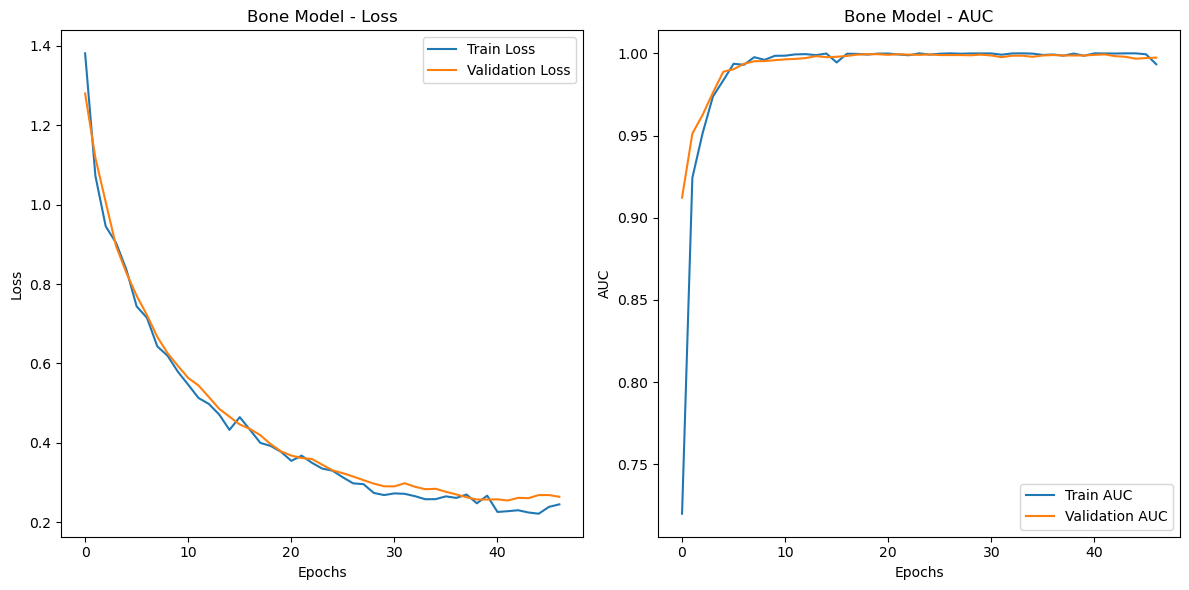

Predicting on test data for Bone Model...
7/7 [==============================] - 0s 2ms/step
Plotting ROC Curve for Bone Model...


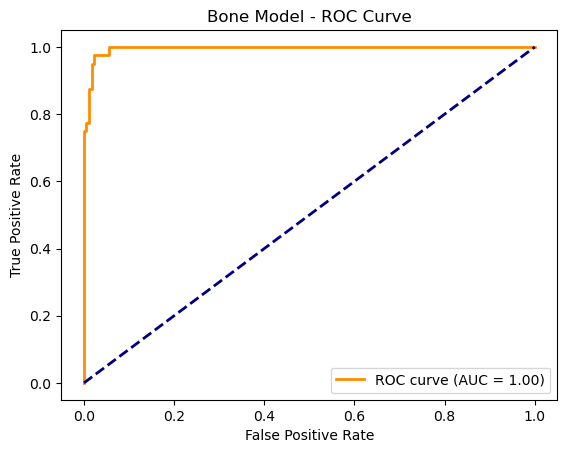

Plotting Confusion Matrix for Bone Model...


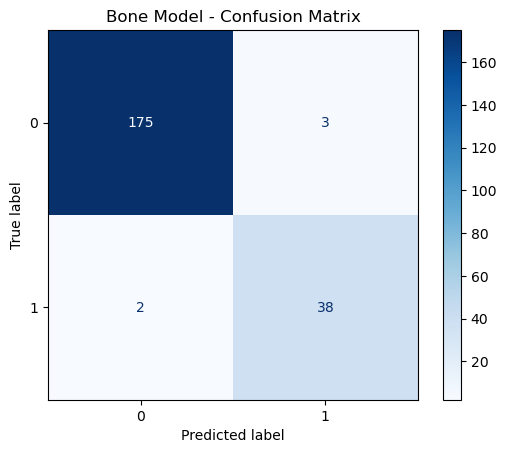

Evaluating Bone Model...
Bone Model - Test Loss: 0.2773, Test AUC: 0.9956, Test ACC: 0.9777, Test SEN: 0.9524, Test SPE: 0.9832, Test MCC: 0.9281, Test F1: 0.9398


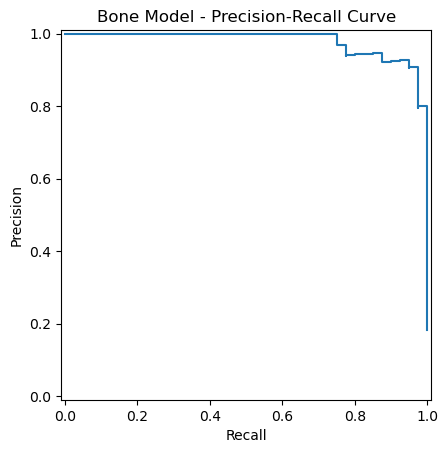

In [17]:
# Define the Bone Model
model_bone = create_model(
    [input_common_bone, input_bone, input_common_correlation_bone, input_specific_correlation_bone],
    'output_bone'
)

# Train and evaluate the Bone Model
y_test_bone, y_scores_bone = train_and_evaluate_model_unique(
    model_bone,
    [x_train_common_bone_train, x_train_bone_train, x_train_common_correlation_bone_train, x_train_unique_correlation_bone_train],
    y_train_common_bone_train,
    [x_train_common_bone_test, x_train_bone_test, x_train_common_correlation_bone_test, x_train_unique_correlation_bone_test],
    y_train_common_bone_test,  # Add this argument for `y_test`
    "Bone Model"
)


# Plot Precision-Recall Curve for the Bone Model
# Call the function with the model name
plot_precision_recall_curves(y_test_bone, y_scores_bone, "Bone Model")


Training Brain Model...
Epoch 1/200
11/11 [==============================] - 1s 39ms/step - loss: 1.6353 - auc: 0.6376 - custom_accuracy: 0.5439 - sensitivity: 0.6773 - specificity: 0.5232 - matthews_correlation_coefficient: 0.1541 - f1_score: 0.2936 - val_loss: 0.9998 - val_auc: 0.7903 - val_custom_accuracy: 0.8116 - val_sensitivity: 0.4433 - val_specificity: 0.8737 - val_matthews_correlation_coefficient: 0.2898 - val_f1_score: 0.3843
Epoch 2/200
11/11 [==============================] - 0s 8ms/step - loss: 1.3140 - auc: 0.8103 - custom_accuracy: 0.6386 - sensitivity: 0.8528 - specificity: 0.6131 - matthews_correlation_coefficient: 0.3087 - f1_score: 0.3679 - val_loss: 0.9051 - val_auc: 0.9151 - val_custom_accuracy: 0.8679 - val_sensitivity: 0.6633 - val_specificity: 0.8992 - val_matthews_correlation_coefficient: 0.5472 - val_f1_score: 0.6088
Epoch 3/200
11/11 [==============================] - 0s 8ms/step - loss: 1.1958 - auc: 0.8734 - custom_accuracy: 0.6610 - sensitivity: 0.7695 - s

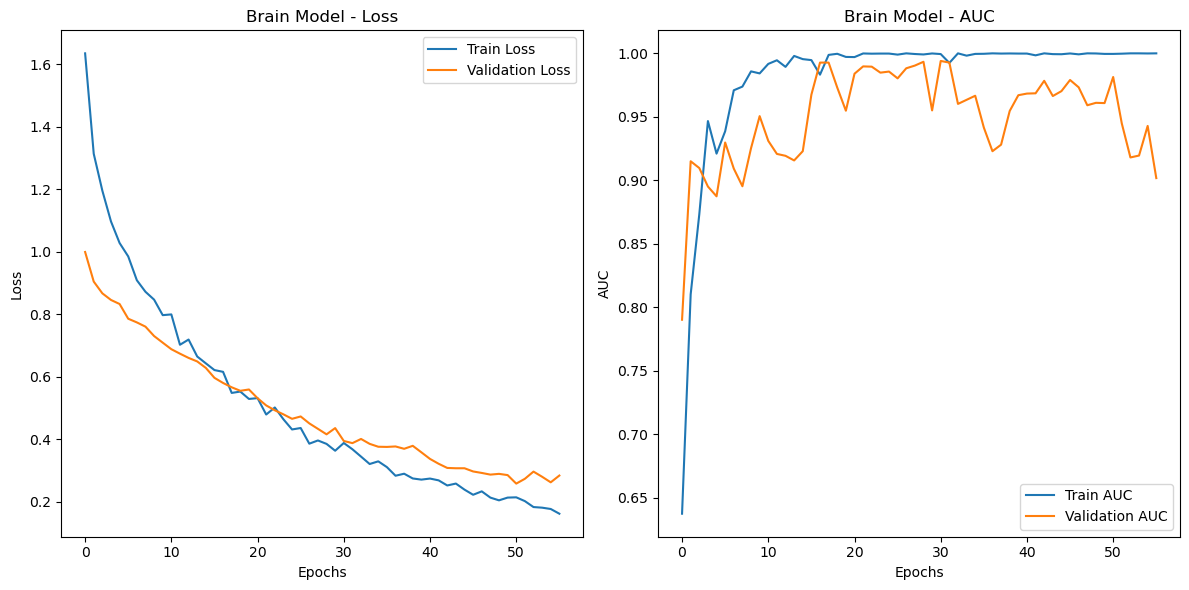

Predicting on test data for Brain Model...
7/7 [==============================] - 0s 2ms/step
Plotting ROC Curve for Brain Model...


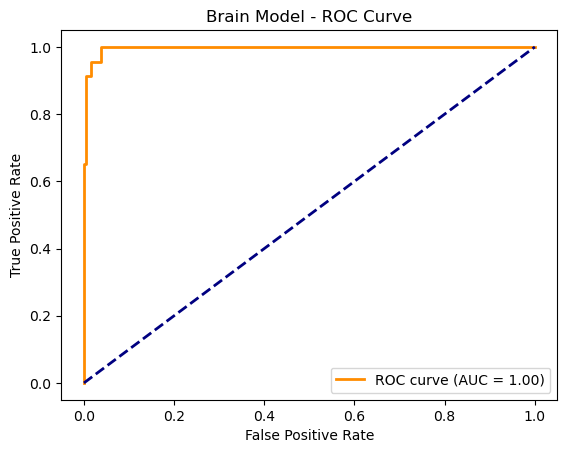

Plotting Confusion Matrix for Brain Model...


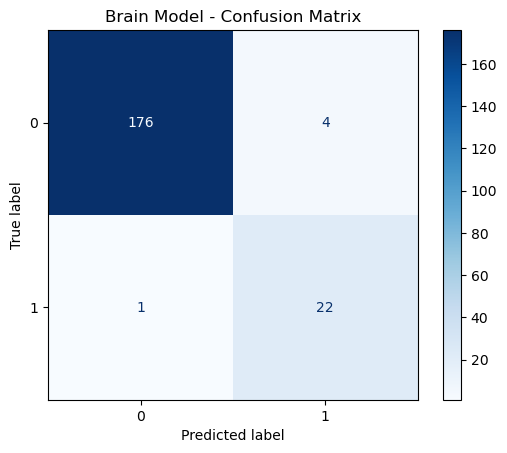

Evaluating Brain Model...
Brain Model - Test Loss: 0.2418, Test AUC: 0.9963, Test ACC: 0.9777, Test SEN: 0.9524, Test SPE: 0.9805, Test MCC: 0.8829, Test F1: 0.8898


In [18]:
# Define the Bone Model
model_brain = create_model(
    [input_common_brain, input_brain, input_common_correlation_brain, input_specific_correlation_brain],
    'output_brain'
)

# Train and evaluate the Bone Model
y_test_brain, y_scores_brain = train_and_evaluate_model_unique(
    model_brain,
    [x_train_common_brain_train, x_train_brain_train, x_train_common_correlation_brain_train, x_train_unique_correlation_brain_train],
    y_train_common_brain_train,
    [x_train_common_brain_test, x_train_brain_test, x_train_common_correlation_brain_test, x_train_unique_correlation_brain_test],
    y_train_common_brain_test,  # Add this argument for `y_test`
    "Brain Model"
)

Training Liver Model...
Epoch 1/200
13/13 [==============================] - 1s 31ms/step - loss: 1.4357 - auc: 0.7254 - custom_accuracy: 0.6370 - sensitivity: 0.7823 - specificity: 0.5956 - matthews_correlation_coefficient: 0.3359 - f1_score: 0.5183 - val_loss: 1.1024 - val_auc: 0.8974 - val_custom_accuracy: 0.7691 - val_sensitivity: 0.8880 - val_specificity: 0.7376 - val_matthews_correlation_coefficient: 0.5281 - val_f1_score: 0.6365
Epoch 2/200
13/13 [==============================] - 0s 7ms/step - loss: 1.2390 - auc: 0.8460 - custom_accuracy: 0.7123 - sensitivity: 0.8183 - specificity: 0.6680 - matthews_correlation_coefficient: 0.4388 - f1_score: 0.5520 - val_loss: 0.9851 - val_auc: 0.9360 - val_custom_accuracy: 0.8316 - val_sensitivity: 0.9478 - val_specificity: 0.7977 - val_matthews_correlation_coefficient: 0.6442 - val_f1_score: 0.7203
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 1.0556 - auc: 0.9120 - custom_accuracy: 0.7412 - sensitivity: 0.9402 - s

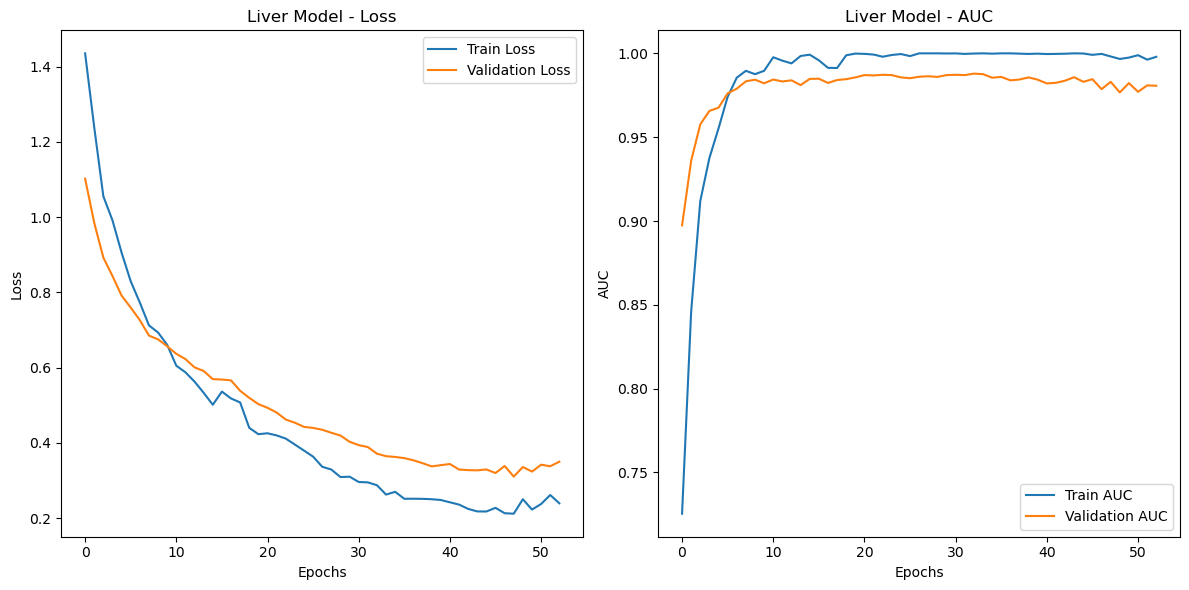

Predicting on test data for Liver Model...
8/8 [==============================] - 0s 2ms/step
Plotting ROC Curve for Liver Model...


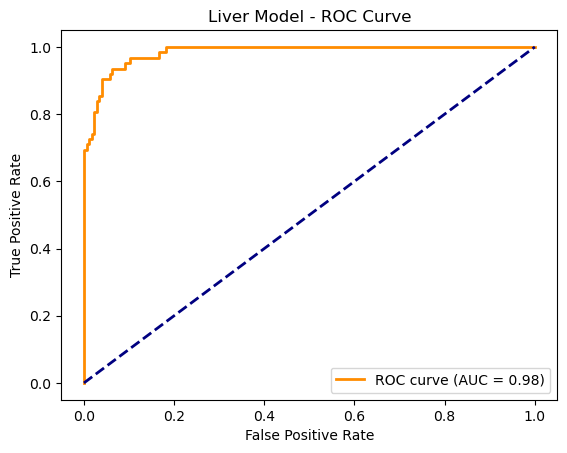

Plotting Confusion Matrix for Liver Model...


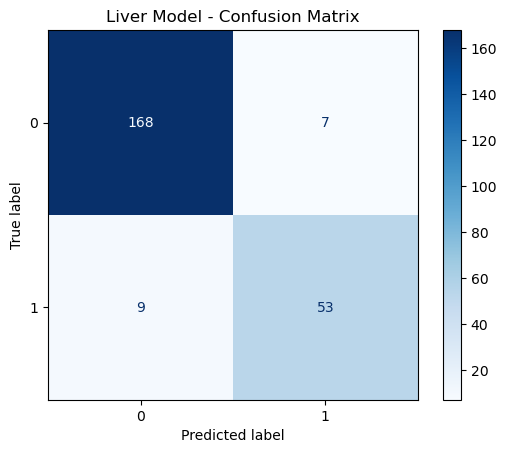

Evaluating Liver Model...
Liver Model - Test Loss: 0.3258, Test AUC: 0.9835, Test ACC: 0.9318, Test SEN: 0.8770, Test SPE: 0.9569, Test MCC: 0.8144, Test F1: 0.8514


In [19]:
# Define the Bone Model
model_liver = create_model(
    [input_common_liver, input_liver, input_common_correlation_liver, input_specific_correlation_liver],
    'output_liver'
)

# Train and evaluate the Bone Model
y_test_liver, y_scores_liver = train_and_evaluate_model_unique(
    model_liver,
    [x_train_common_liver_train, x_train_liver_train, x_train_common_correlation_liver_train, x_train_unique_correlation_liver_train],
    y_train_common_liver_train,
    [x_train_common_liver_test, x_train_liver_test, x_train_common_correlation_liver_test, x_train_unique_correlation_liver_test],
    y_train_common_liver_test,  # Add this argument for `y_test`
    "Liver Model"
)

Training Lung Model...
Epoch 1/200
11/11 [==============================] - 1s 36ms/step - loss: 1.5109 - auc: 0.5934 - custom_accuracy: 0.5710 - sensitivity: 0.4794 - specificity: 0.5878 - matthews_correlation_coefficient: 0.0546 - f1_score: 0.2594 - val_loss: 1.6818 - val_auc: 0.8631 - val_custom_accuracy: 0.4487 - val_sensitivity: 1.0000 - val_specificity: 0.3652 - val_matthews_correlation_coefficient: 0.2593 - val_f1_score: 0.3156
Epoch 2/200
11/11 [==============================] - 0s 8ms/step - loss: 1.1941 - auc: 0.8458 - custom_accuracy: 0.7503 - sensitivity: 0.8750 - specificity: 0.7366 - matthews_correlation_coefficient: 0.4574 - f1_score: 0.5167 - val_loss: 1.4444 - val_auc: 0.9233 - val_custom_accuracy: 0.5303 - val_sensitivity: 1.0000 - val_specificity: 0.4601 - val_matthews_correlation_coefficient: 0.3126 - val_f1_score: 0.3517
Epoch 3/200
11/11 [==============================] - 0s 8ms/step - loss: 1.1670 - auc: 0.8782 - custom_accuracy: 0.7335 - sensitivity: 0.8318 - sp

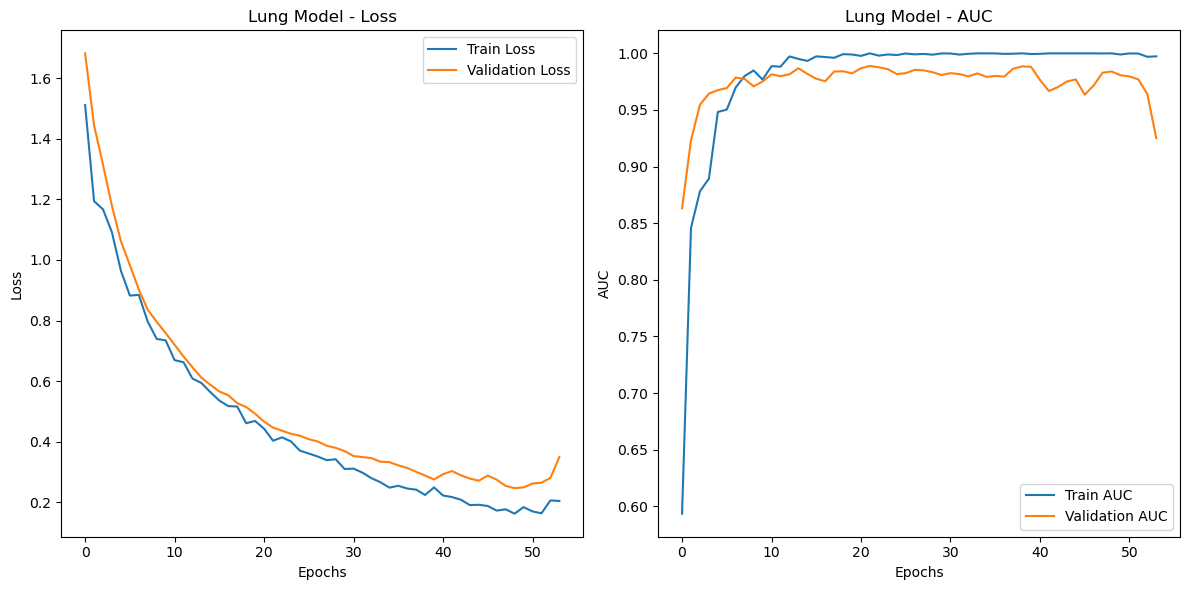

Predicting on test data for Lung Model...
7/7 [==============================] - 0s 2ms/step
Plotting ROC Curve for Lung Model...


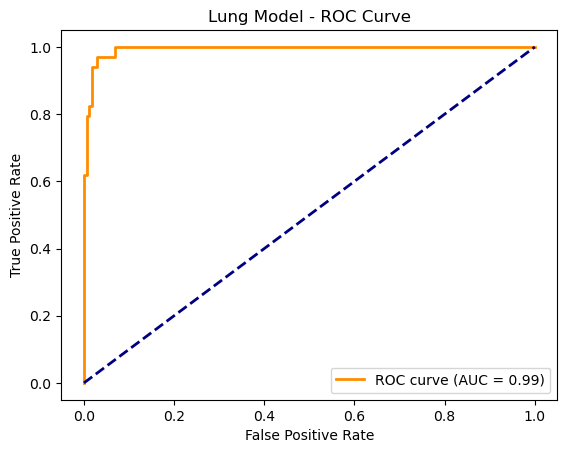

Plotting Confusion Matrix for Lung Model...


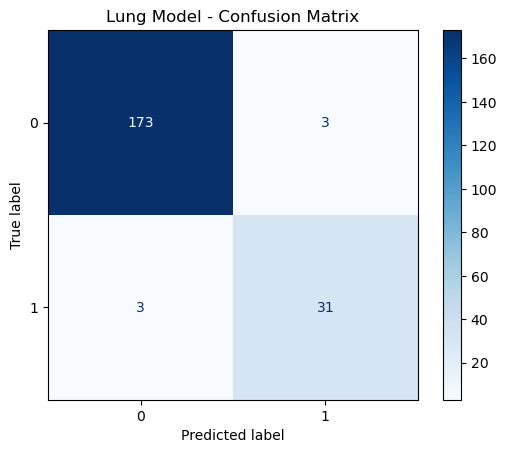

Evaluating Lung Model...
Lung Model - Test Loss: 0.2395, Test AUC: 0.9935, Test ACC: 0.9732, Test SEN: 0.9107, Test SPE: 0.9833, Test MCC: 0.9029, Test F1: 0.9105


In [20]:
# Define the Bone Model
model_lung = create_model(
    [input_common_lung, input_lung, input_common_correlation_lung, input_specific_correlation_lung],
    'output_lung'
)

# Train and evaluate the Bone Model
y_test_lung, y_scores_lung = train_and_evaluate_model_unique(
    model_lung,
    [x_train_common_lung_train, x_train_lung_train, x_train_common_correlation_lung_train, x_train_unique_correlation_lung_train],
    y_train_common_lung_train,
    [x_train_common_lung_test, x_train_lung_test, x_train_common_correlation_lung_test, x_train_unique_correlation_lung_test],
    y_train_common_lung_test,  # Add this argument for `y_test`
    "Lung Model"
)

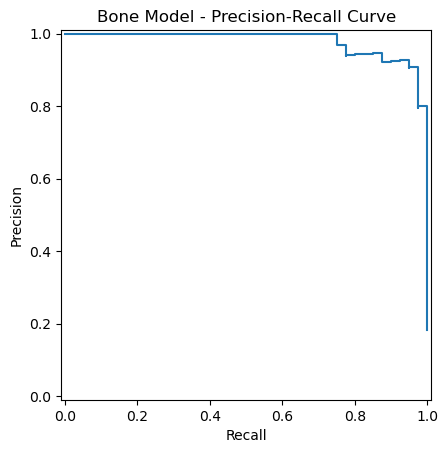

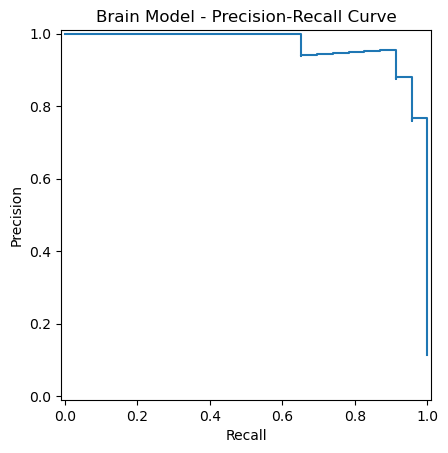

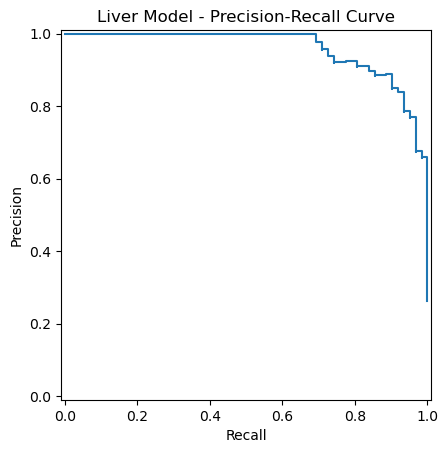

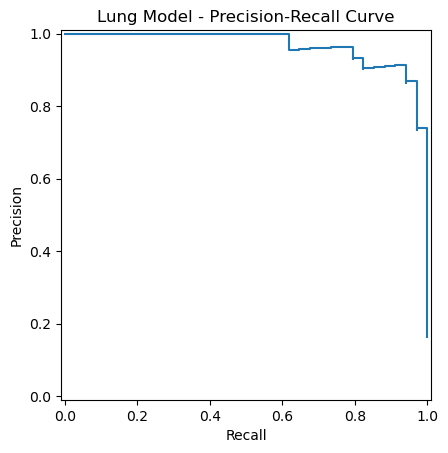

In [21]:
plot_precision_recall_curves(y_test_bone, y_scores_bone, "Bone Model")
plot_precision_recall_curves(y_test_brain, y_scores_brain, "Brain Model")
plot_precision_recall_curves(y_test_liver, y_scores_liver, "Liver Model")
plot_precision_recall_curves(y_test_lung, y_scores_lung, "Lung Model")


In [22]:
#Noise

In [14]:
def add_gaussian_noise(data, sigma=0.01):
    noise = tf.random.normal(shape=tf.shape(data), mean=0.0, stddev=sigma, dtype=data.dtype)
    return data + noise


In [23]:
def train_and_evaluate_model_with_stability(model, train_input_data, y_train, test_input_data, y_test, model_name, epochs=200, batch_size=32, validation_split=0.3):
    # Modify the training data generator to include perturbations
    def data_generator(X, y):
        while True:
            indices = np.arange(len(y))
            np.random.shuffle(indices)
            for i in range(0, len(y) - batch_size + 1, batch_size):
                batch_indices = indices[i:i + batch_size]
                x_batch = [x[batch_indices] for x in X]
                y_batch = y[batch_indices]

                # Apply perturbations
                x_batch_perturbed = [add_gaussian_noise(x, sigma=0.01) for x in x_batch]
                
                # Combine original and perturbed data
                x_batch_combined = [np.concatenate([x, x_p], axis=0) for x, x_p in zip(x_batch, x_batch_perturbed)]
                y_batch_combined = np.concatenate([y_batch, y_batch], axis=0)
                
                yield x_batch_combined, y_batch_combined

    # Create the data generator for training
    train_gen = data_generator(train_input_data, y_train)
    steps_per_epoch = len(y_train) // batch_size

    # Fit the model
    history = model.fit(
        train_gen,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=(test_input_data, y_test),
        callbacks=[early_stopping]
    )

    # Predict on test data
    y_pred_prob = model.predict(test_input_data).ravel()

    # Plot precision-recall curve
    plot_precision_recall_curves(y_test, y_pred_prob, model_name)

    # Evaluate on test data
    test_results = model.evaluate(test_input_data, y_test, verbose=0)
    print(f"{model_name} - Test Loss: {test_results[0]:.4f}, Test AUC: {test_results[1]:.4f}, Test ACC: {test_results[2]:.4f}, Test SEN: {test_results[3]:.4f}, Test SPE: {test_results[4]:.4f}, Test MCC: {test_results[5]:.4f}, Test F1: {test_results[6]:.4f}")

    return y_test, y_pred_prob


Epoch 1/200


/tmp/ipykernel_2497578/1518553712.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_batch = y[batch_indices]


15/15 [==============================] - 1s 16ms/step - loss: 0.2493 - auc: 0.9986 - custom_accuracy: 0.9865 - sensitivity: 0.9868 - specificity: 0.9888 - matthews_correlation_coefficient: 0.9460 - f1_score: 0.9436 - val_loss: 0.2689 - val_auc: 0.9962 - val_custom_accuracy: 0.9777 - val_sensitivity: 0.9524 - val_specificity: 0.9832 - val_matthews_correlation_coefficient: 0.9281 - val_f1_score: 0.9398
Epoch 2/200
15/15 [==============================] - 0s 12ms/step - loss: 0.2371 - auc: 0.9987 - custom_accuracy: 0.9885 - sensitivity: 0.9689 - specificity: 0.9924 - matthews_correlation_coefficient: 0.9585 - f1_score: 0.9650 - val_loss: 0.2594 - val_auc: 0.9973 - val_custom_accuracy: 0.9777 - val_sensitivity: 0.9762 - val_specificity: 0.9779 - val_matthews_correlation_coefficient: 0.9294 - val_f1_score: 0.9396
Epoch 3/200
15/15 [==============================] - 0s 10ms/step - loss: 0.2137 - auc: 0.9999 - custom_accuracy: 0.9958 - sensitivity: 0.9944 - specificity: 0.9964 - matthews_corr

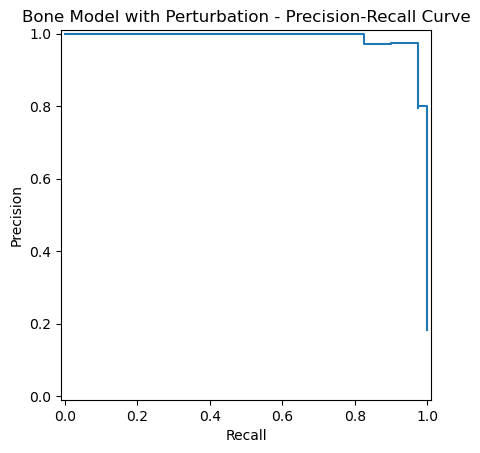

Bone Model with Perturbation - Test Loss: 0.1203, Test AUC: 0.9978, Test ACC: 0.9911, Test SEN: 0.9762, Test SPE: 0.9945, Test MCC: 0.9719, Test F1: 0.9760
Epoch 1/200


/tmp/ipykernel_2497578/1518553712.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_batch = y[batch_indices]


14/14 [==============================] - 1s 16ms/step - loss: 0.2683 - auc: 0.9793 - custom_accuracy: 0.9688 - sensitivity: 0.8935 - specificity: 0.9720 - matthews_correlation_coefficient: 0.8213 - f1_score: 0.8276 - val_loss: 0.2577 - val_auc: 0.9949 - val_custom_accuracy: 0.9688 - val_sensitivity: 0.9524 - val_specificity: 0.9698 - val_matthews_correlation_coefficient: 0.8562 - val_f1_score: 0.8650
Epoch 2/200
14/14 [==============================] - 0s 10ms/step - loss: 0.2348 - auc: 0.9848 - custom_accuracy: 0.9788 - sensitivity: 0.9423 - specificity: 0.9875 - matthews_correlation_coefficient: 0.9126 - f1_score: 0.9184 - val_loss: 0.2470 - val_auc: 0.9954 - val_custom_accuracy: 0.9732 - val_sensitivity: 0.9524 - val_specificity: 0.9754 - val_matthews_correlation_coefficient: 0.8655 - val_f1_score: 0.8739
Epoch 3/200
14/14 [==============================] - 0s 11ms/step - loss: 0.2150 - auc: 0.9940 - custom_accuracy: 0.9788 - sensitivity: 0.9505 - specificity: 0.9852 - matthews_corr

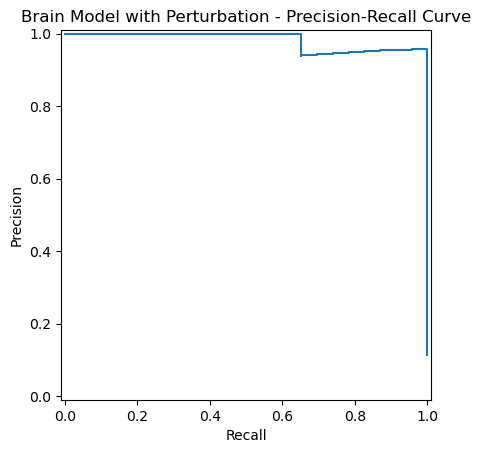

Brain Model with Perturbation - Test Loss: 0.1173, Test AUC: 0.9981, Test ACC: 0.9866, Test SEN: 0.9320, Test SPE: 0.9951, Test MCC: 0.9374, Test F1: 0.9400
Epoch 1/200


/tmp/ipykernel_2497578/1518553712.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_batch = y[batch_indices]


17/17 [==============================] - 1s 16ms/step - loss: 0.2396 - auc: 0.9960 - custom_accuracy: 0.9752 - sensitivity: 0.9638 - specificity: 0.9796 - matthews_correlation_coefficient: 0.9288 - f1_score: 0.9425 - val_loss: 0.3020 - val_auc: 0.9880 - val_custom_accuracy: 0.9396 - val_sensitivity: 0.9038 - val_specificity: 0.9517 - val_matthews_correlation_coefficient: 0.8264 - val_f1_score: 0.8591
Epoch 2/200
17/17 [==============================] - 0s 11ms/step - loss: 0.2156 - auc: 0.9984 - custom_accuracy: 0.9862 - sensitivity: 0.9749 - specificity: 0.9935 - matthews_correlation_coefficient: 0.9606 - f1_score: 0.9684 - val_loss: 0.3138 - val_auc: 0.9877 - val_custom_accuracy: 0.9396 - val_sensitivity: 0.8949 - val_specificity: 0.9569 - val_matthews_correlation_coefficient: 0.8290 - val_f1_score: 0.8618
Epoch 3/200
17/17 [==============================] - 0s 11ms/step - loss: 0.2109 - auc: 0.9981 - custom_accuracy: 0.9835 - sensitivity: 0.9910 - specificity: 0.9833 - matthews_corr

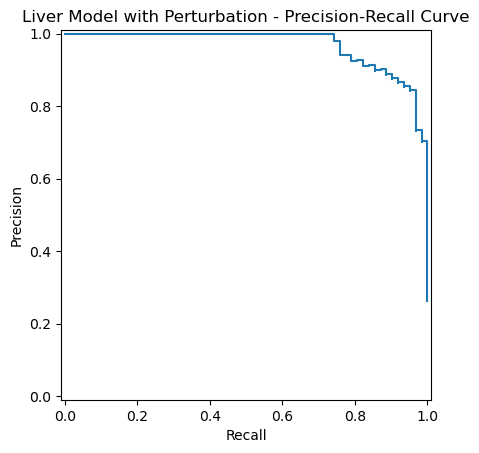

Liver Model with Perturbation - Test Loss: 0.3020, Test AUC: 0.9880, Test ACC: 0.9396, Test SEN: 0.9038, Test SPE: 0.9517, Test MCC: 0.8264, Test F1: 0.8591
Epoch 1/200


/tmp/ipykernel_2497578/1518553712.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_batch = y[batch_indices]


15/15 [==============================] - 2s 16ms/step - loss: 0.2081 - auc: 0.9943 - custom_accuracy: 0.9760 - sensitivity: 0.9279 - specificity: 0.9884 - matthews_correlation_coefficient: 0.9083 - f1_score: 0.9142 - val_loss: 0.2674 - val_auc: 0.9830 - val_custom_accuracy: 0.9598 - val_sensitivity: 0.8571 - val_specificity: 0.9783 - val_matthews_correlation_coefficient: 0.8464 - val_f1_score: 0.8664
Epoch 2/200
15/15 [==============================] - 0s 11ms/step - loss: 0.1716 - auc: 0.9999 - custom_accuracy: 0.9937 - sensitivity: 0.9917 - specificity: 0.9941 - matthews_correlation_coefficient: 0.9711 - f1_score: 0.9737 - val_loss: 0.2201 - val_auc: 0.9933 - val_custom_accuracy: 0.9777 - val_sensitivity: 0.9464 - val_specificity: 0.9843 - val_matthews_correlation_coefficient: 0.9174 - val_f1_score: 0.9257
Epoch 3/200
15/15 [==============================] - 0s 11ms/step - loss: 0.1950 - auc: 0.9980 - custom_accuracy: 0.9771 - sensitivity: 0.9746 - specificity: 0.9817 - matthews_corr

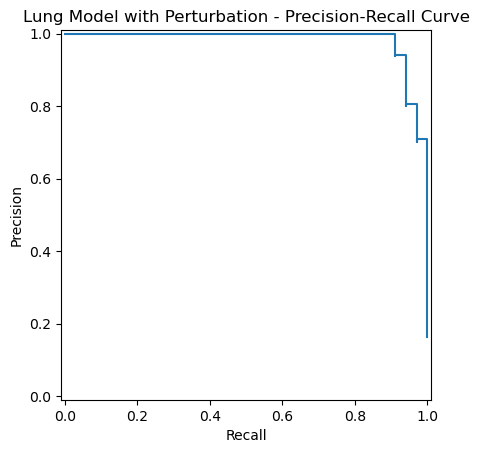

Lung Model with Perturbation - Test Loss: 0.1197, Test AUC: 0.9958, Test ACC: 0.9777, Test SEN: 0.9464, Test SPE: 0.9843, Test MCC: 0.9174, Test F1: 0.9257


In [24]:
# Train and evaluate perturbed Bone Model
y_test_bone_pert, y_scores_bone_pert = train_and_evaluate_model_with_stability(
    model_bone,
    [x_train_common_bone_train, x_train_bone_train, x_train_common_correlation_bone_train, x_train_unique_correlation_bone_train],
    y_train_common_bone_train,
    [x_train_common_bone_test, x_train_bone_test, x_train_common_correlation_bone_test, x_train_unique_correlation_bone_test],
    y_train_common_bone_test,
    "Bone Model with Perturbation"
)

y_test_brain_pert, y_scores_brain_pert = train_and_evaluate_model_with_stability(
    model_brain,
    [x_train_common_brain_train, x_train_brain_train, x_train_common_correlation_brain_train, x_train_unique_correlation_brain_train],
    y_train_common_brain_train,
    [x_train_common_brain_test, x_train_brain_test, x_train_common_correlation_brain_test, x_train_unique_correlation_brain_test],
    y_train_common_brain_test,
    "Brain Model with Perturbation"
)

y_test_liver_pert, y_scores_liver_pert = train_and_evaluate_model_with_stability(
    model_liver,
    [x_train_common_liver_train, x_train_liver_train, x_train_common_correlation_liver_train, x_train_unique_correlation_liver_train],
    y_train_common_liver_train,
    [x_train_common_liver_test, x_train_liver_test, x_train_common_correlation_liver_test, x_train_unique_correlation_liver_test],
    y_train_common_liver_test,
    "Liver Model with Perturbation"
)

y_test_lung_pert, y_scores_lung_pert = train_and_evaluate_model_with_stability(
    model_lung,
    [x_train_common_lung_train, x_train_lung_train, x_train_common_correlation_lung_train, x_train_unique_correlation_lung_train],
    y_train_common_lung_train,
    [x_train_common_lung_test, x_train_lung_test, x_train_common_correlation_lung_test, x_train_unique_correlation_lung_test],
    y_train_common_lung_test,
    "Lung Model with Perturbation"
)


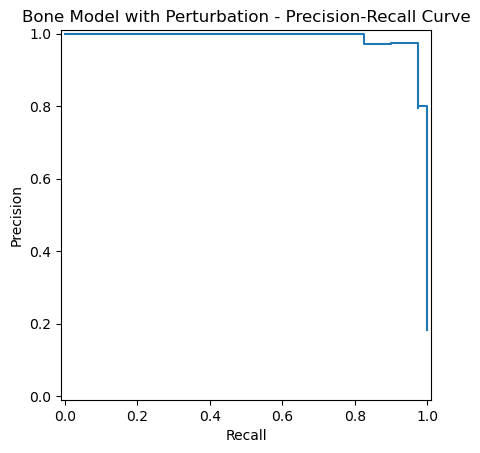

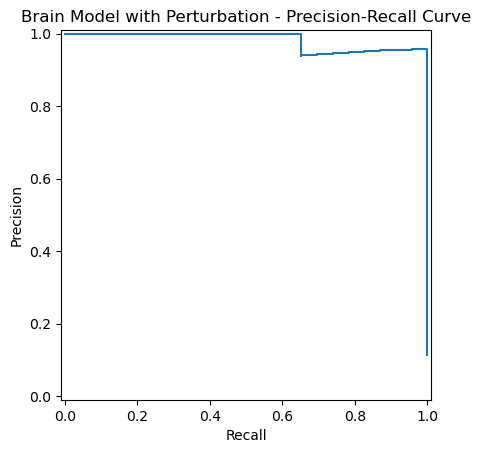

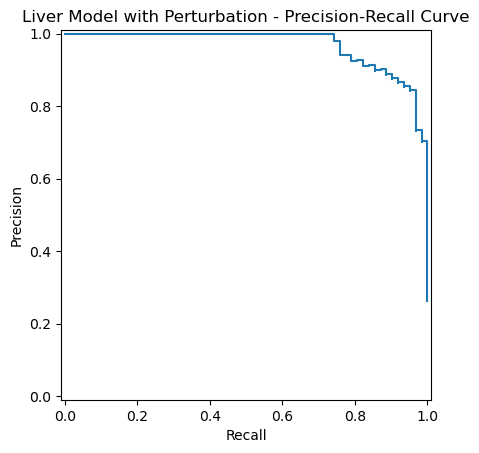

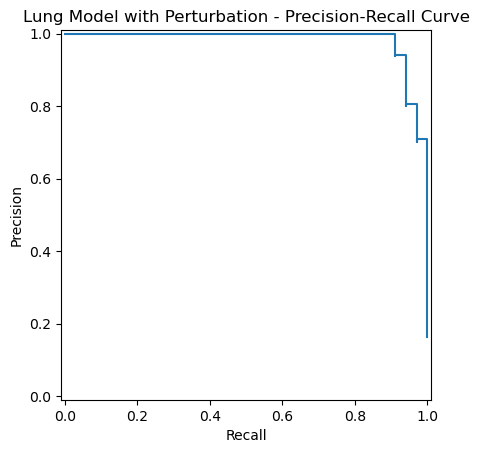

In [25]:
plot_precision_recall_curves(y_test_bone_pert, y_scores_bone_pert, "Bone Model with Perturbation")
plot_precision_recall_curves(y_test_brain_pert, y_scores_brain_pert, "Brain Model with Perturbation")
plot_precision_recall_curves(y_test_liver_pert, y_scores_liver_pert, "Liver Model with Perturbation")
plot_precision_recall_curves(y_test_lung_pert, y_scores_lung_pert, "Lung Model with Perturbation")


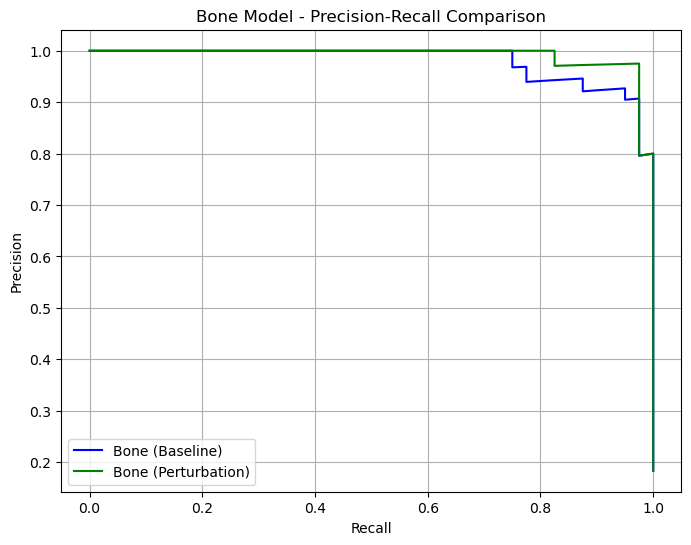

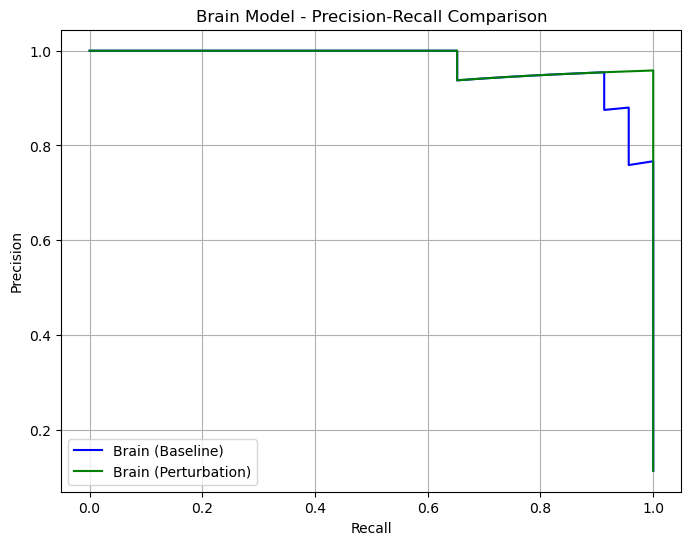

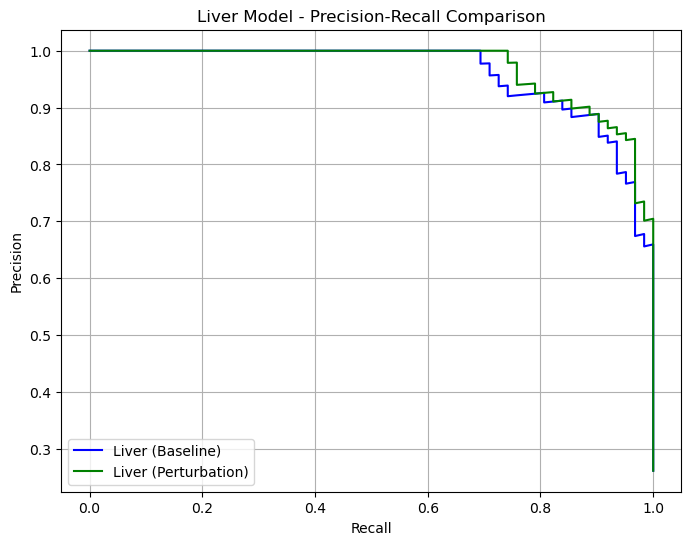

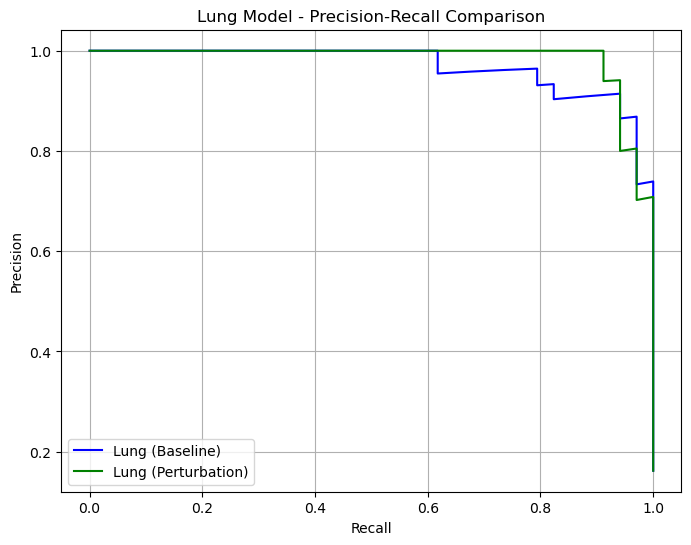

In [26]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

def compare_precision_recall_curves(y_test_baseline, y_scores_baseline, y_test_pert, y_scores_pert, model_name):
    """
    Compare Precision-Recall curves of the baseline model and the model with perturbation.

    Parameters:
        y_test_baseline: True labels for baseline model.
        y_scores_baseline: Predicted probabilities for baseline model.
        y_test_pert: True labels for perturbation model.
        y_scores_pert: Predicted probabilities for perturbation model.
        model_name: Name of the model being evaluated (e.g., "Bone").
    """
    precision_baseline, recall_baseline, _ = precision_recall_curve(y_test_baseline, y_scores_baseline)
    precision_pert, recall_pert, _ = precision_recall_curve(y_test_pert, y_scores_pert)

    plt.figure(figsize=(8, 6))
    # Plot baseline model
    plt.plot(recall_baseline, precision_baseline, label=f"{model_name} (Baseline)", color="blue")
    # Plot perturbation model
    plt.plot(recall_pert, precision_pert, label=f"{model_name} (Perturbation)", color="green")
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} Model - Precision-Recall Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

# Compare Bone Model
compare_precision_recall_curves(y_test_bone, y_scores_bone, y_test_bone_pert, y_scores_bone_pert, "Bone")

# Compare Brain Model
compare_precision_recall_curves(y_test_brain, y_scores_brain, y_test_brain_pert, y_scores_brain_pert, "Brain")

# Compare Liver Model
compare_precision_recall_curves(y_test_liver, y_scores_liver, y_test_liver_pert, y_scores_liver_pert, "Liver")

# Compare Lung Model
compare_precision_recall_curves(y_test_lung, y_scores_lung, y_test_lung_pert, y_scores_lung_pert, "Lung")


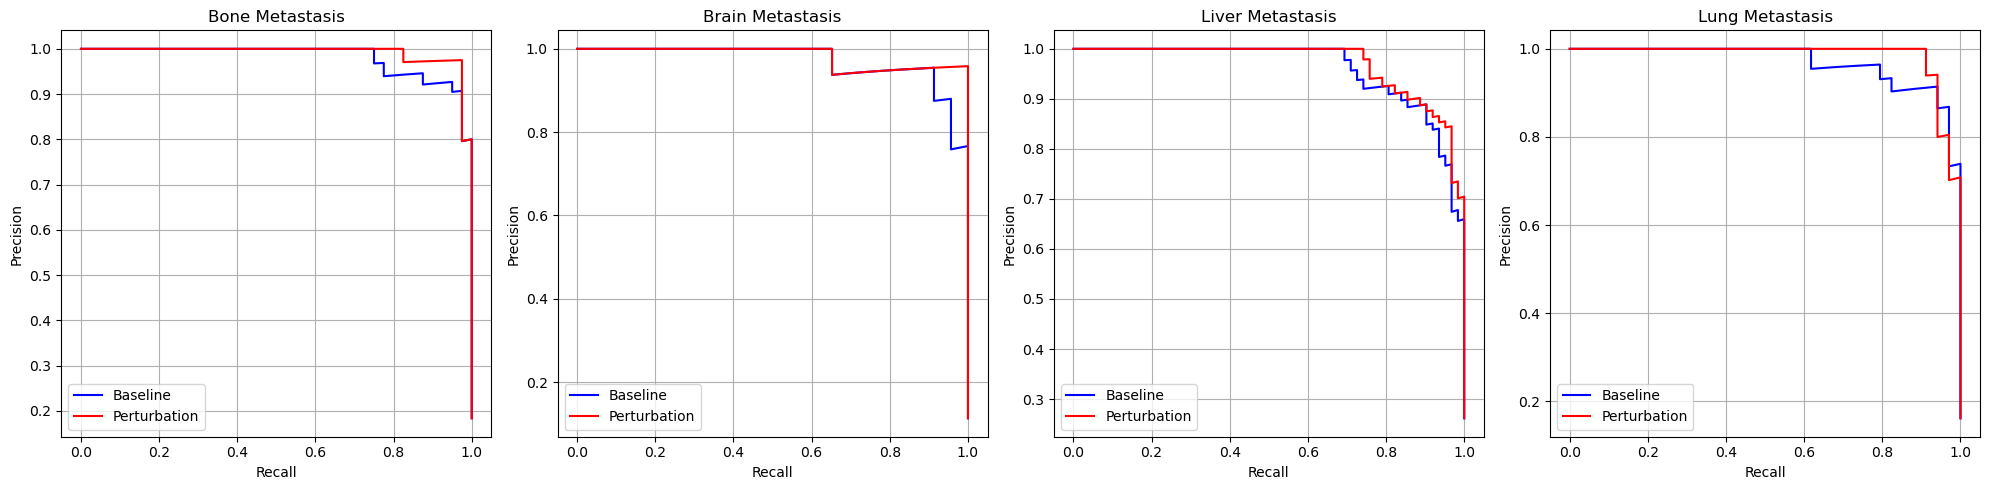

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

def plot_comparison_subplot(y_test_baseline, y_scores_baseline, y_test_pert, y_scores_pert, model_name, ax):
    """
    Plot Precision-Recall comparison for a single model on a given subplot axis.
    """
    precision_baseline, recall_baseline, _ = precision_recall_curve(y_test_baseline, y_scores_baseline)
    precision_pert, recall_pert, _ = precision_recall_curve(y_test_pert, y_scores_pert)

    ax.plot(recall_baseline, precision_baseline, label="Baseline", color="blue")
    ax.plot(recall_pert, precision_pert, label="Perturbation", color="red")
    ax.set_title(model_name)
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.legend()
    ax.grid(True)

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Adjust size as needed

# Bone Model Comparison
plot_comparison_subplot(y_test_bone, y_scores_bone, y_test_bone_pert, y_scores_bone_pert, "Bone Metastasis", axs[0])

# Brain Model Comparison
plot_comparison_subplot(y_test_brain, y_scores_brain, y_test_brain_pert, y_scores_brain_pert, "Brain Metastasis", axs[1])

# Liver Model Comparison
plot_comparison_subplot(y_test_liver, y_scores_liver, y_test_liver_pert, y_scores_liver_pert, "Liver Metastasis", axs[2])

# Lung Model Comparison
plot_comparison_subplot(y_test_lung, y_scores_lung, y_test_lung_pert, y_scores_lung_pert, "Lung Metastasis", axs[3])

# Adjust layout
plt.tight_layout()
plt.show()


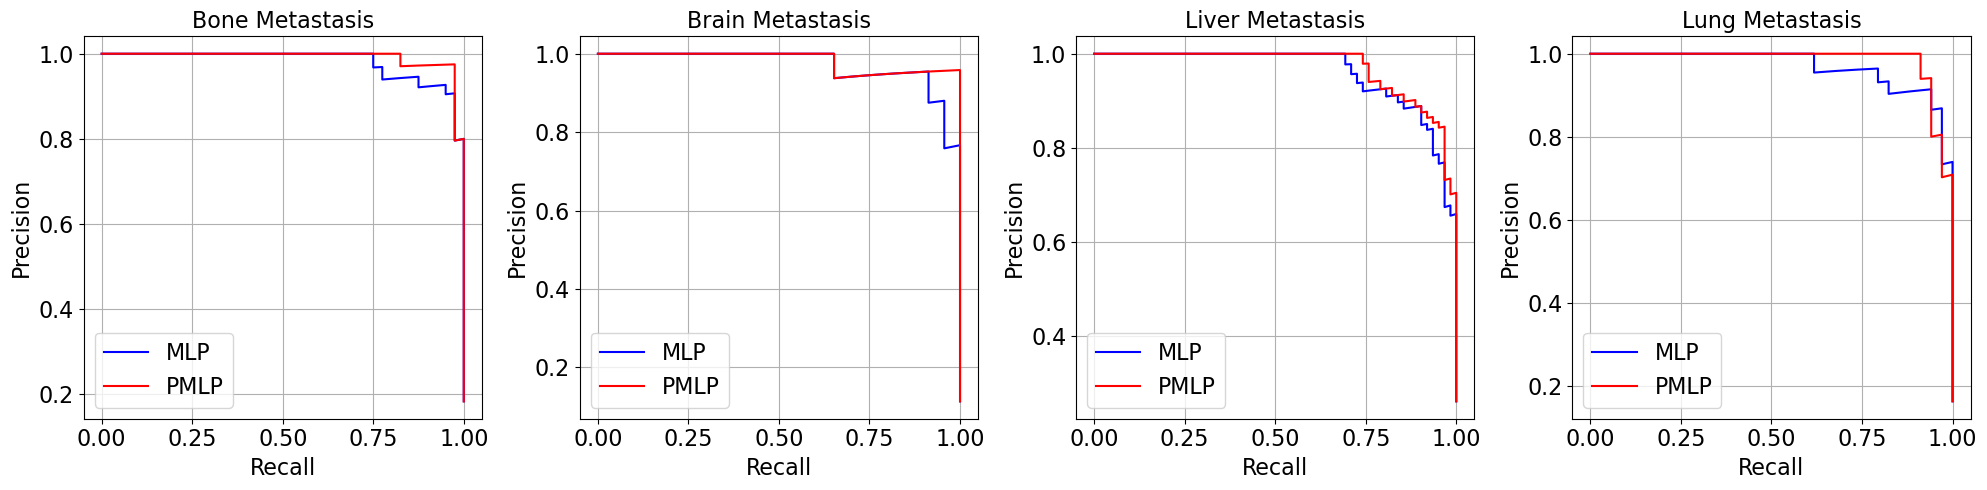

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

def plot_comparison_subplot(y_test_baseline, y_scores_baseline, y_test_pert, y_scores_pert, model_name, ax):
    """
    Plot Precision-Recall comparison for a single model on a given subplot axis.
    """
    # Calculate Precision-Recall curve
    precision_baseline, recall_baseline, _ = precision_recall_curve(y_test_baseline, y_scores_baseline)
    precision_pert, recall_pert, _ = precision_recall_curve(y_test_pert, y_scores_pert)

    # Plotting the curves
    ax.plot(recall_baseline, precision_baseline, label="MLP", color="blue")
    ax.plot(recall_pert, precision_pert, label="PMLP", color="red")
    
    # Set titles, labels and grid
    ax.set_title(model_name, fontsize=16)  # Increase title font size
    ax.set_xlabel("Recall", fontsize=16)   # Increase X-axis label font size
    ax.set_ylabel("Precision", fontsize=16)  # Increase Y-axis label font size
    ax.tick_params(axis='both', labelsize=16)  # Increase tick labels font size
    ax.legend(fontsize=16)  # Increase legend font size
    ax.grid(True)

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Adjust size as needed

# Plot comparisons for each model
plot_comparison_subplot(y_test_bone, y_scores_bone, y_test_bone_pert, y_scores_bone_pert, "Bone Metastasis", axs[0])
plot_comparison_subplot(y_test_brain, y_scores_brain, y_test_brain_pert, y_scores_brain_pert, "Brain Metastasis", axs[1])
plot_comparison_subplot(y_test_liver, y_scores_liver, y_test_liver_pert, y_scores_liver_pert, "Liver Metastasis", axs[2])
plot_comparison_subplot(y_test_lung, y_scores_lung, y_test_lung_pert, y_scores_lung_pert, "Lung Metastasis", axs[3])

# Adjust layout
plt.tight_layout()
plt.show()


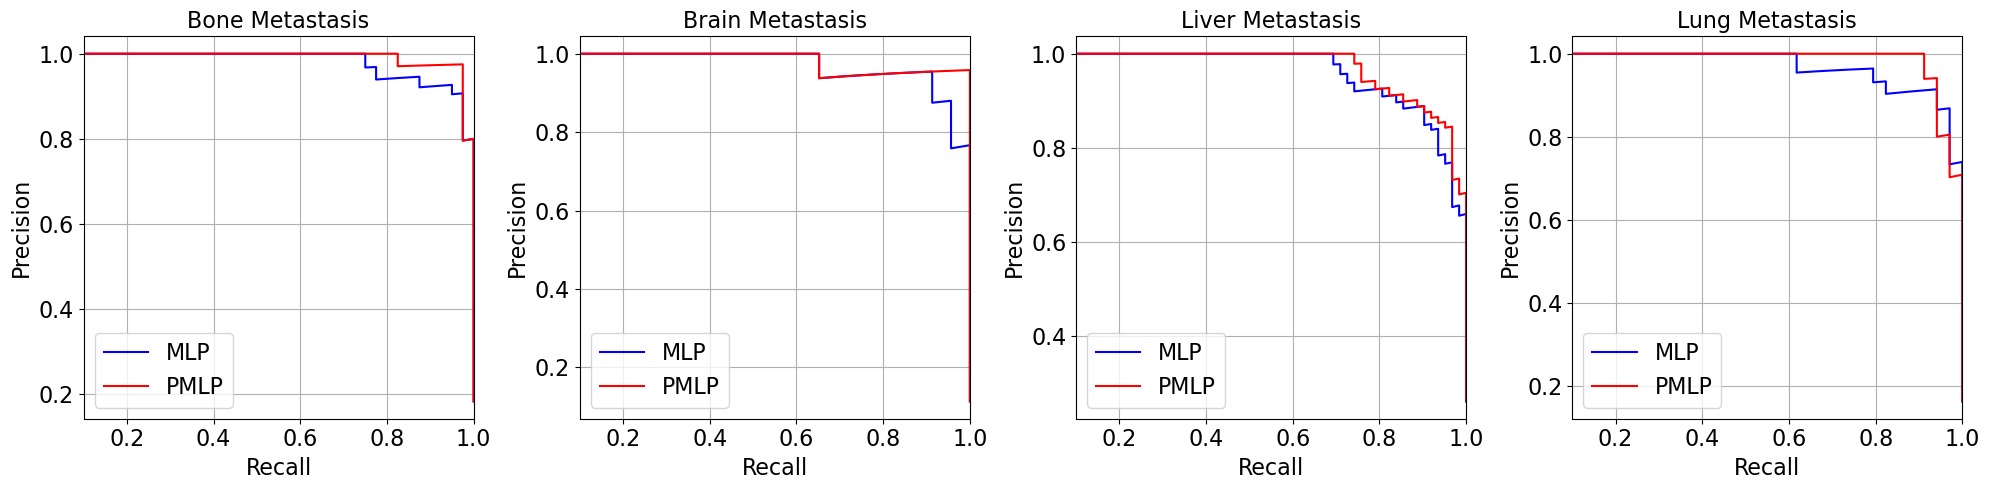

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

def plot_comparison_subplot(y_test_baseline, y_scores_baseline, y_test_pert, y_scores_pert, model_name, ax, min_recall=0.1):
    """
    Plot Precision-Recall comparison for a single model on a given subplot axis,
    starting from a minimum recall value.
    """
    # Calculate Precision-Recall curve for baseline
    precision_baseline, recall_baseline, _ = precision_recall_curve(y_test_baseline, y_scores_baseline)
    start_index_baseline = next(i for i, v in enumerate(recall_baseline) if v >= min_recall)
    
    # Calculate Precision-Recall curve for perturbation
    precision_pert, recall_pert, _ = precision_recall_curve(y_test_pert, y_scores_pert)
    start_index_pert = next(i for i, v in enumerate(recall_pert) if v >= min_recall)
    
    # Plotting the curves starting from min_recall
    ax.plot(recall_baseline[start_index_baseline:], precision_baseline[start_index_baseline:], label="MLP", color="blue")
    ax.plot(recall_pert[start_index_pert:], precision_pert[start_index_pert:], label="PMLP", color="red")
    
    # Set titles, labels and grid
    ax.set_title(model_name, fontsize=16)
    ax.set_xlabel("Recall", fontsize=16)
    ax.set_ylabel("Precision", fontsize=16)
    ax.tick_params(axis='both', labelsize=16)
    ax.legend(fontsize=16)
    ax.grid(True)
    ax.set_xlim([min_recall, 1.0])  # Ensure all plots start from the same recall

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot comparisons for each model with a common minimum recall
plot_comparison_subplot(y_test_bone, y_scores_bone, y_test_bone_pert, y_scores_bone_pert, "Bone Metastasis", axs[0])
plot_comparison_subplot(y_test_brain, y_scores_brain, y_test_brain_pert, y_scores_brain_pert, "Brain Metastasis", axs[1])
plot_comparison_subplot(y_test_liver, y_scores_liver, y_test_liver_pert, y_scores_liver_pert, "Liver Metastasis", axs[2])
plot_comparison_subplot(y_test_lung, y_scores_lung, y_test_lung_pert, y_scores_lung_pert, "Lung Metastasis", axs[3])

plt.tight_layout()
plt.show()
